# Units of Production Depreciation Method


In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import unittest

## Function of Units of Production Depreciation and Unit Tests

In [2]:
def units_of_production(prior_asset_value, original_asset_value, residual_asset_value, estimated_production, actual_production):
    depreciation_expense = (original_asset_value - residual_asset_value) * (actual_production / estimated_production)
    
    next_asset_value = prior_asset_value - depreciation_expense 

    # calculate new value
    
    if next_asset_value <= residual_asset_value:
        # worth only the residual
        return residual_asset_value
    else:
        # still worth more than residual
        return next_asset_value
    
### Unit tests ###

class unitsofproductionTests(unittest.TestCase):
    
    def test_depreciation_function_month_0_to_1(self):
        depreciated_value = units_of_production(22000.0, 22000.00, 2000.0, 10000.0, 50.0)
        expected_value = 22000.0 - (22000.0 -2000.0) * 50.0 / 10000.0
        self.assertAlmostEqual(depreciated_value, expected_value)
        
    def test_depreciation_function_year_4_to_5(self):
        depreciated_value = units_of_production(4000.0, 22000.0, 2000.0, 10000.0, 1000.0)
        expected_value = 4000.0 - (22000.0 - 2000.0) * (1000.0 / 10000.0)
        self.assertAlmostEqual(depreciated_value, expected_value)
        
    def test_depreciation_function_one_year(self):
        depreciated_value = units_of_production(22000.0, 22000.00, 2000.0, 10000.0, 2000.0)
        expected_value = 22000 - (22000.0 - 2000.0) * (2000.0 / 10000.0)
        self.assertAlmostEqual(depreciated_value, expected_value)
        
testSuite = unittest.TestLoader().loadTestsFromName("__main__.unitsofproductionTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)

test_depreciation_function_month_0_to_1 (__main__.unitsofproductionTests) ... ok
test_depreciation_function_one_year (__main__.unitsofproductionTests) ... ok
test_depreciation_function_year_4_to_5 (__main__.unitsofproductionTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Asset 1
* original cost: $22,000

* residual value: $2,000

* estimated total production: 10,000 units

In [3]:
year_1 = 5000.0
year_2 = 1000.0
year_3 = 500.0
year_4 = 1500.0
year_5 = 2000.0

total_years = 8

def production_amount(year_number):
    if year_number == 1:
        return year_1
    elif year_number == 2:
        return year_2
    elif year_number == 3:
        return year_3
    elif year_number == 4:
        return year_4
    else: 
        return year_5
    
year_numbers = np.arange(1, total_years + 1)

In [4]:

times_to_plot = np.arange(2000.0, 2000.0 + total_years + 1, 1.0)

asset_values_to_plot = np.zeros((total_years + 1,))

asset_values_to_plot[0] = 22000.0

for i in year_numbers:
    # The units_of_production function is expecting the following arguments:
    # prior_asset_value, original_asset_value, residual_asset_value, estimated_production, actual_production
    actual_production = production_amount(i)
    asset_values_to_plot[i] = units_of_production(asset_values_to_plot[i - 1], 22000.0, 2000.0, 10000.0, actual_production)

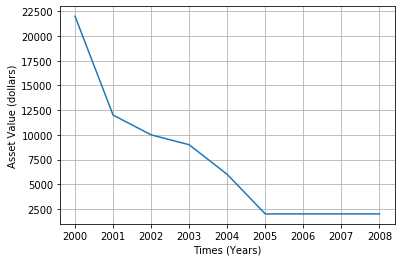

In [5]:
plt.plot(times_to_plot, asset_values_to_plot)

plt.xlabel("Times (Years)")
plt.ylabel("Asset Value (dollars)")
plt.grid()
plt.show()

## Asset 2
* original cost: $8,000

*  residual value: $300

* estimated total production: 20,000 units

In [6]:
two_year_1 = 7000.0
two_year_2 = 1300.0
two_year_3 = 4700.0
two_year_4 = 1500.0
two_year_5 = 2000.0
two_year_6 = 500.0
two_year_7 = 2000.0
two_year_8 = 1000.0

def production_amount_2(year_number):
    if year_number == 1:
        return two_year_1
    elif year_number == 2:
        return two_year_2
    elif year_number == 3:
        return two_year_3
    elif year_number == 4:
        return two_year_4
    elif year_number == 5:
        return two_year_5
    elif year_number == 6:
        return two_year_6
    elif year_number == 7:
        return two_year_7
    else:
        return two_year_8


In [7]:
asset_2_values_to_plot = np.zeros((total_years + 1,))

asset_2_values_to_plot[0] = 8000.0


for i in year_numbers:
    # The units_of_production function is expecting the following arguments:
    # prior_asset_value, original_asset_value, residual_asset_value, estimated_production, actual_production
    actual_production_2 = production_amount_2(i)
    asset_2_values_to_plot[i] = units_of_production(asset_2_values_to_plot[i - 1], 8000.0, 300.0, 20000.0, actual_production_2)

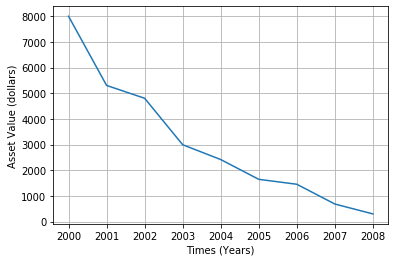

In [8]:
plt.plot(times_to_plot, asset_2_values_to_plot)

plt.xlabel("Times (Years)")
plt.ylabel("Asset Value (dollars)")
plt.grid()
plt.show()



### Show the Portfolio as a Stacked Plot

We used this example code:

* [Tutorial on Stackplot Feature](https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html)

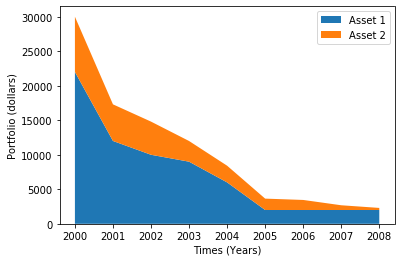

In [9]:
labels = ["Asset 1", "Asset 2"]

figure, axis = plt.subplots()
plt.xlabel("Times (Years)")
plt.ylabel("Portfolio (dollars)")
axis.stackplot(times_to_plot, asset_values_to_plot, asset_2_values_to_plot, labels=labels)


axis.legend(loc='upper right')

plt.show()
